In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # import the random forest model
from sklearn import  preprocessing # used for label encoding and imputing NaNs

import datetime as dt # we will need this to convert the date to a number of days since some point

from sklearn.tree import export_graphviz
# import pydotplus
import six

import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [2]:
def visualize_analysis_results(df,tag):
    fig = plt.figure()
    fig.set_figheight(4)
    fig.set_figwidth(12)
    histogram = plt.subplot(1, 2, 1)
    histogram.hist(df[tag])
    norm_prob_plot = plt.subplot(1, 2, 2)
    scipy.stats.probplot(df[tag], plot=norm_prob_plot)
    plt.ylabel(tag)
    plt.title(str(tag)+" With mean " + str(df[tag].mean()))
    plt.savefig("Analysis_Visuals_{}.png".format(tag), bbox_inches='tight')
    plt.show()


def scatter_plot(df,x_tag,y_tag):
    plt.figure(1)
    plt.scatter(master_data[x_tag],master_data[y_tag], color='r')
    plt.ylabel(y_tag)
    plt.xlabel(x_tag)
    plt.title(x_tag + " vs "+ y_tag)
    plt.show()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Columns: 237 entries, analysisTitle to sens_type
dtypes: bool(1), float64(219), int64(13), object(4)
memory usage: 129.7+ KB
None


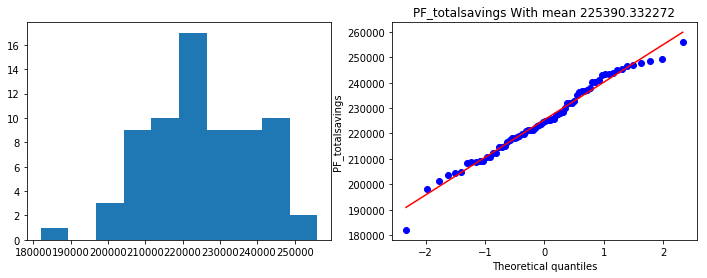

In [3]:
master_data = pd.read_excel('6205_master_data.xlsx')
print master_data.info()
visualize_analysis_results(master_data,'PF_totalsavings')

In [4]:
# Transform so loss function is forest; RMSE on transformed to get RMSLE. 
# large residuals are not penalized as heavily
# Natural log of one plus input
ylog1p_train = np.log1p(master_data['PF_totalsavings'].values)
x_train = master_data.filter(like='Utility Import')


In [5]:
# Decision Tree Model
model = DecisionTreeRegressor(max_depth = 4)
model.fit(X = x_train, y = ylog1p_train)
ylog_pred = model.predict(X = x_train)
print "Tree Training Error: ",np.sqrt(np.mean((ylog_pred - ylog1p_train)**2))

Tree Training Error:  0.013852338343251232


In [6]:
# Random Forest Model
model = RandomForestRegressor(n_estimators=100,random_state=2018,
                             oob_score = True,
                             min_samples_leaf=5)
model.fit(X = x_train, y = ylog1p_train)
ylog_pred = model.predict(X = x_train)
print "Random Forest Training Error:  ", np.sqrt(np.mean((ylog_pred - ylog1p_train)**2))

Random Forest Training Error:   0.020210283548485496


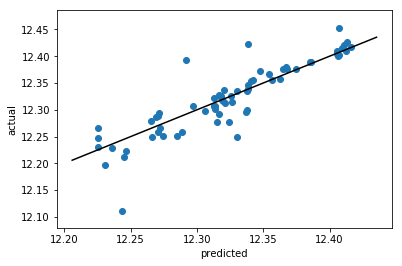

In [7]:
# actual vs predicted
fig, ax = plt.subplots()
plt.scatter(model.oob_prediction_, ylog1p_train)
plt.xlabel('predicted')
plt.ylabel('actual')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color = 'black')
plt.show()

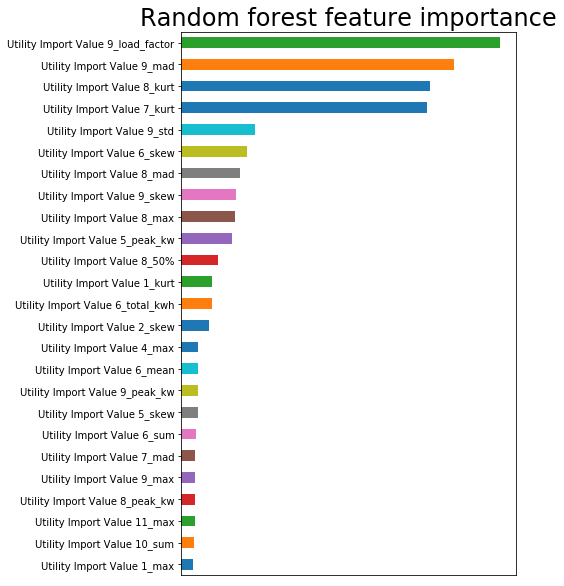

In [8]:
# Feature Importance !
df_ = pd.DataFrame(x_train.columns, columns = ['feature'])
df_['fscore'] = model.feature_importances_[:, ]

# Plot relative importance of top 10 features
df_['fscore'] = df_['fscore'] / df_['fscore'].max()
df_.sort_values('fscore', ascending = False, inplace = True)
df_ = df_[0:25]
df_.sort_values('fscore', ascending = True, inplace = True)
df_.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('Random forest feature importance', fontsize = 24)
plt.xlabel('')
plt.ylabel('')
plt.xticks([], [])
plt.yticks(fontsize=10)
plt.show()

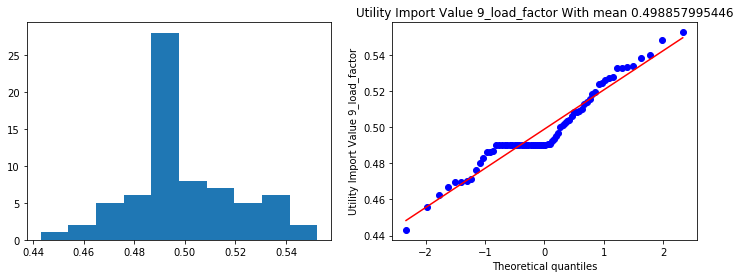

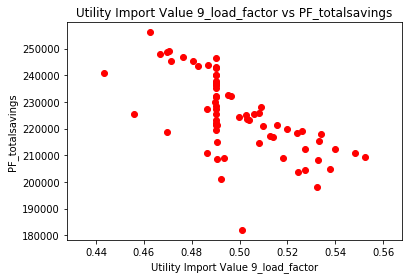

In [9]:
visualize_analysis_results(master_data,'Utility Import Value 9_load_factor')
scatter_plot(master_data,'Utility Import Value 9_load_factor','PF_totalsavings')

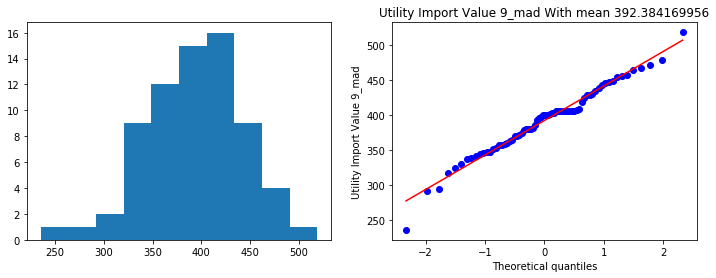

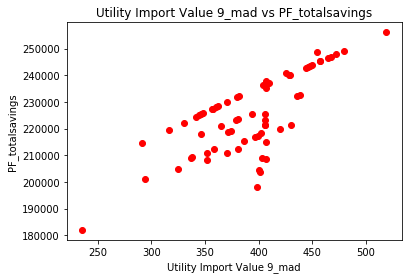

MAD is Median Absolute Deviation: variability of a univariate sampel of quantitative data


In [10]:
visualize_analysis_results(master_data,'Utility Import Value 9_mad')
scatter_plot(master_data,'Utility Import Value 9_mad','PF_totalsavings')
print "MAD is Median Absolute Deviation: variability of a univariate sampel of quantitative data"

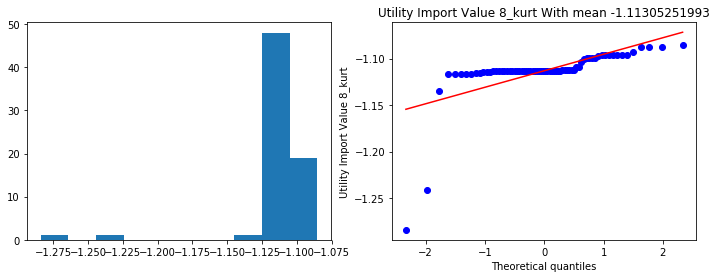

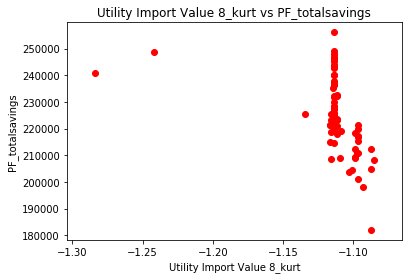

Kurtosis: measure of the "tailedness" of the probability distribution 


In [12]:
visualize_analysis_results(master_data,'Utility Import Value 8_kurt')
scatter_plot(master_data,'Utility Import Value 8_kurt','PF_totalsavings')
print 'Kurtosis: measure of the "tailedness" of the probability distribution '

In [13]:
model.decision_path

<bound method RandomForestRegressor.decision_path of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=2018, verbose=0, warm_start=False)>

In [14]:
print model.score

<bound method RandomForestRegressor.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=2018, verbose=0, warm_start=False)>


In [15]:
print model.decision_path

<bound method RandomForestRegressor.decision_path of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=2018, verbose=0, warm_start=False)>
